<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install sklearn-lvq

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn_lvq import GlvqModel
from sklearn_lvq.utils import plot2d
from sklearn.mixture import GaussianMixture
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
import statsmodels.api as sm
from sklearn_lvq import GlvqModel
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Para acomodar la información si viene por minuto y en registros, 
#df = pd.read_csv('rg1.csv')
## aqui agrupamos por minuto
#df_grouped_multiple = df.groupby(['YEAR','MONTH','DAY','HOUR']).agg({'RG1': ['mean']})
#df_grouped_multiple.columns = ['rg1_mean']
#df_grouped_multiple = df_grouped_multiple.reset_index()
## aquí pivoteamos
#df1 = df_grouped_multiple.pivot(index=['YEAR','MONTH','DAY'], columns='HOUR', values='rg1_mean').dropna()
#print(df1) #df1.to_csv('res.csv')
#df1.columns = [['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17', '18','19', '20', '21', '22', '23']]

In [ ]:
CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
def print_serie(serie_,title_,dot_):
    fig, ax1 = plt.subplots(figsize=(7,4))
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel('horas', color=LETRASNARA, fontsize='large')
    ax1.set_ylabel('radiación solar', color=LETRASNARA, fontsize='large')
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)    
    for p in serie_:
        if dot_== True:
           plt.plot(p,alpha=0.4, linestyle='dashed', linewidth=3)
        else:
           plt.plot(p,alpha=0.4)              
    plt.show()

In [ ]:
def scatterplot(X_,Y_,tags_,centers_,title_,namefile_ ):
    fig, ax1 = plt.subplots(figsize=(4,4))
    CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA ='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
    for k in centers_:
        x = k[7]; y = k[8]
        plt.plot(x,y,"o",color="red",)
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel('hora 7',  color=LETRASNARA, fontsize='large')
    ax1.set_ylabel('hora 8',  color=LETRASNARA, fontsize='large')
    plt.scatter(X_, Y_, c=tags_, alpha=0.3)
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)
    plt.savefig(namefile_, transparent=True)
    plt.show()

In [ ]:
def print_patrones(list_series,list_categorias,list_patrones,title_): 
    cat = np.unique(list_categorias)
    n = math.ceil(pow(n_clusters, 0.5))
    fig, axs = plt.subplots(n, n, figsize=(15,14))
    row=0; col=0
    for c in cat:
        j = 0
        for g in list_categorias:    
            if c == g:
                axs[row,col].plot(list_series[j],alpha=0.5)
                axs[row,col].set_title(title_+str(c))
                #axs[row,col].xaxis.set_xlabel(horas_invierno)
            j = j + 1
        if len(list_patrones) != 0:
            axs[row, col].plot(list_patrones[c],alpha=0.7,color='red',linestyle='dashed',linewidth=4)
        col = col + 1
        if col == n:
            col = 0
            row = row + 1  
    plt.show()

# **Leemos datos**

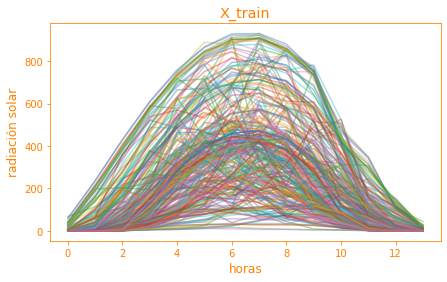

In [ ]:
df = pd.read_csv('rg1_horas.csv')
df_invierno = df[(df.MONTH==11)|(df.MONTH==12)|(df.MONTH==1)|(df.MONTH==2)|(df.MONTH==3)|(df.MONTH==4)]
df_verano   = df[(df.MONTH==5) |(df.MONTH==6) |(df.MONTH==7)|(df.MONTH==8)|(df.MONTH==9)|(df.MONTH==10)]
df = df_invierno
horas_verano   = ['4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']
horas_invierno = ['5','6','7','8','9','10','11','12','13','14','15','16','17','18']
X = df[horas_invierno].to_numpy()
x_total   = df[['SUMA']].to_numpy()
dx_total  = df[['dSUMA']].to_numpy()
ddx_total = df[['ddSUMA']].to_numpy()

#Normalizing the data
#sc = StandardScaler()
#X  = sc.fit_transform(X)
#y  = sc.fit_transform(Y)

## Crea conjuntos de datos de entrenamiento y prueba
X_train, X_test = train_test_split(X, test_size=.2)#

print_serie(X_train,'X_train',False)
#print_serie(X_test,'X_test',False)

# **K-means**


y_kmeans [ 0  4 15  8  6  4 13  2  6  2 15  4 15  4  0 14 11  9  3  2  2 15  9  7
  4 13  6  7  4 11 12 12  0  9  2  6 15 12  4  2  7  2  0 11 11  2 14  4
  4  7  7  0 10  6  9  6  8  0 12  0  0 15  0  9  1 11  4  7  9 11 14  9]
y_kmeans_train [ 0  6  0  7 14  4  7  4  9  4  9  2  9  4  0 14  3  3  2  9  2  2  0  4
 15 12  2  2  0  2 14 12  4 12  2  0 11  2 15  2  7  0  9 15 11  4  2 11
  6  7  4 12 13 15 15  3  2 15 12  4  0 12 12  7  0 12  0  9  6 15  0  0
 11  0 12  0  0 12  9  9  2  5 10 14  9 12  7  7  4  9  2 12  9  2  1  2
  9  1  6 11  4 12  4  2 13  6  3  9  6  6  6  3  6  0  8  6  6  3  7  0
 13  7  7  2  9 12 15  2 14  6  4 12  3  4  7  0  4  2  9 12 12 12 14  0
 10  2 15  2 14  4  7 13  6  9  4  7  0  0 14  0 12 14  9  2  6  7 15  0
  3 14 12  6 13 13  3  3 12  4  0  6  9  7  3  2 15  0  0  7  1  6  6 10
 14  6  9  4  7  7  4  9 12  2  7  6 12  1  9 11 11 10 13 10  7  2  8  8
  8  5  0  2 10  7 12  0  4  4 15  2  2  4  0  2  7  6  9  2  2 12  8  7
  0  0  2  9  2  6  0  8  

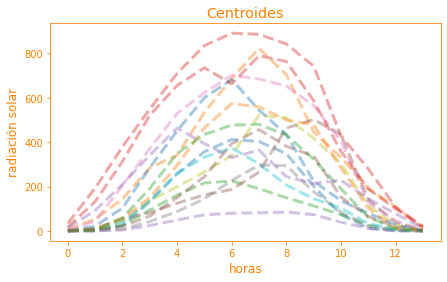

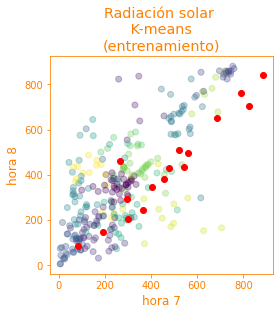

In [ ]:
n_clusters = 16
k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10) # una variante MiniBatchKMeans  
k_means = k_means.fit(X_train)
values  = k_means.cluster_centers_.squeeze()
labels  = k_means.labels_
centers_= k_means.cluster_centers_
#print('Centroides', centers_)
#print('Exactitud:', k_means.score(X_test))
y_kmeans = k_means.predict(X_test)
y_kmeans_train = k_means.predict(X_train)
print('y_kmeans' , y_kmeans)
print('y_kmeans_train' , y_kmeans_train)
print_serie(centers_,'Centroides',True)
scatterplot(X_train[:,4],X_train[:,8],labels,centers_,'Radiación solar \n K-means \n(entrenamiento)','fig_t13_train')

X_train (kmeans)


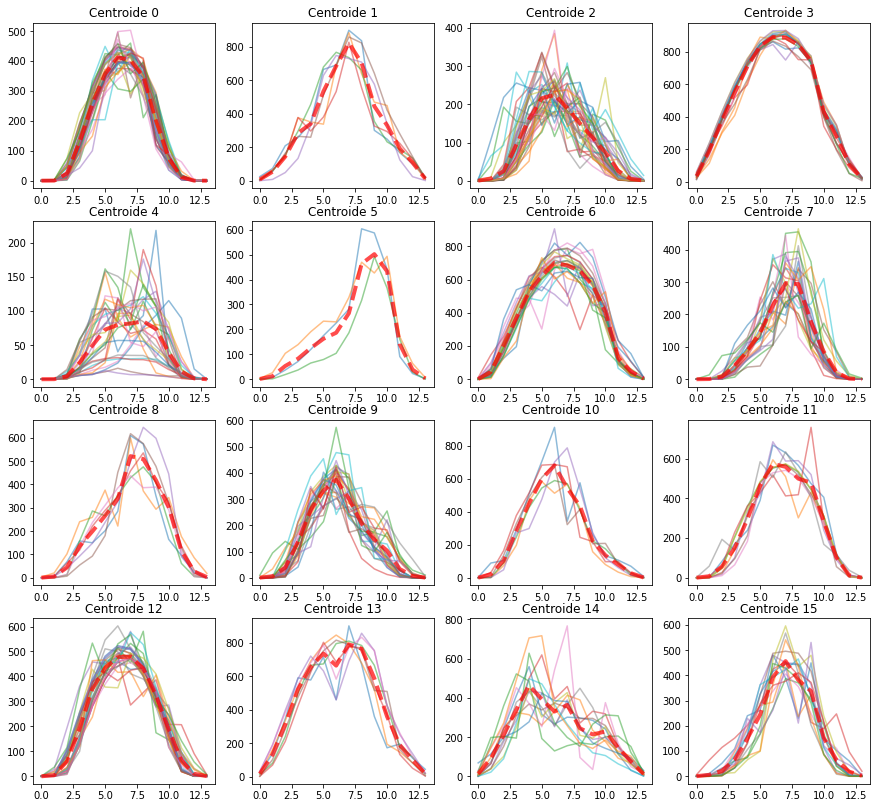

In [ ]:
print('X_train (kmeans)')
print_patrones(list_series=X_train,list_categorias=y_kmeans_train,list_patrones=centers_,title_='Centroide ')

X_test (kmeans)


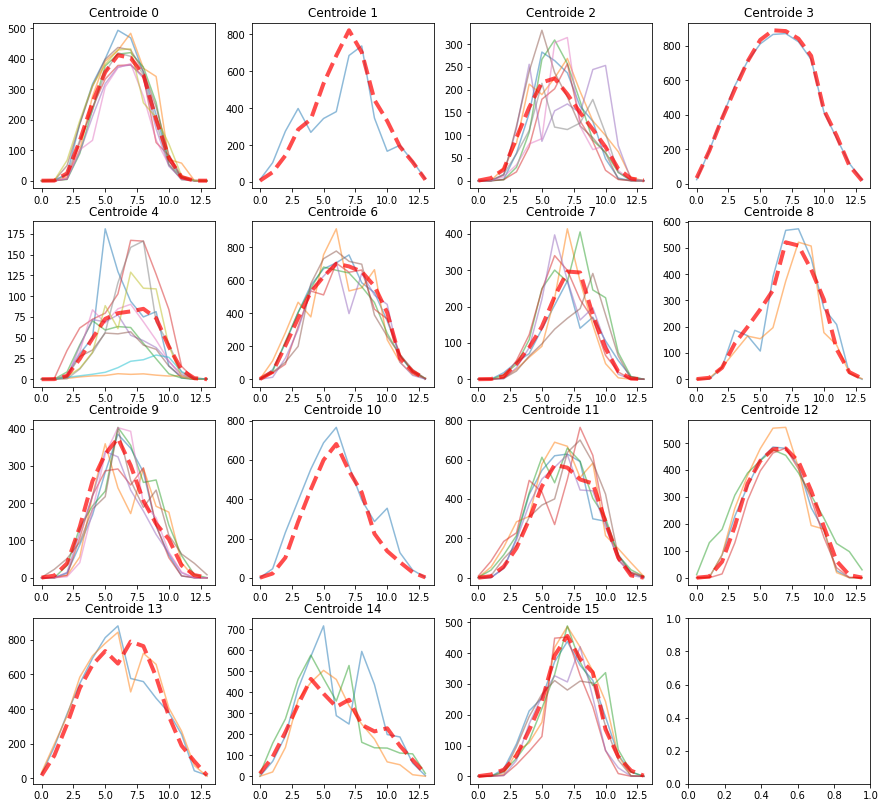

In [ ]:
print('X_test (kmeans)')
print_patrones(list_series=X_test,list_categorias=y_kmeans,list_patrones=centers_,title_='Centroide ')

# **LVQ**

In [ ]:
#https://mrnuggelz.github.io/sklearn-lvq/auto_examples/plot_rslvq.html
#https://mrnuggelz.github.io/sklearn-lvq/auto_examples/index.html
#https://mrnuggelz.github.io/sklearn-lvq/modules/generated/sklearn_lvq.GlvqModel.html#sklearn_lvq.GlvqModel
#https://mrnuggelz.github.io/sklearn-lvq/auto_examples/plot_glvq.html#sphx-glr-auto-examples-plot-glvq-py

print('GLVQ')
glvq = GlvqModel(prototypes_per_class=1, initial_prototypes=None)
glvq.fit(X_train,labels)
glvq_pred = glvq.predict(X_test)
glvq_pred_train = glvq.predict(X_train)
print('glvq_pred',glvq_pred)
print('glvq_pred_train', glvq_pred_train)
print('classification accuracy:', (glvq.score(X_test, glvq_pred)))
plt.show()

GLVQ
glvq_pred [ 0  4 15  8  6  4 13  2  6  2 15  4 15  4  0 14 11  0  3  2  2 15  2  2
  4  3  6  7  4 11 12 12  0  9  2  6  0 14  4  2  7  2  0 11  8  2 14  4
  4  2  2  0 10  6  9  6  8  0 12  0  0  0  0  9  1 11  4  7  9  8 14  9]
glvq_pred_train [ 0  6  0  2 14  4  7  4  9  4  9  2  9  4  0 14  3  3  2  9  2  2  0  4
 15 12  2  2  0  2 14 12  4 12  2  0 11  2 15  2  7  0  9  7 11  4  2 11
  6  7  4 12 13 15 15  3  2 15 12  4  0 12 12  7  0 12  0  0  6 15  0  0
 11  0 12  0  0 12  9  9  2  5 10 14  9 12  7  7  4  9  2 12  9  2  1  2
  9  1  6 11  4 12  4  2 13  6  3  9  6  6  6  3  6  0  8  6  6  3  7  0
 13  2  7  2  9 12 15  2 14  6  4 12  3  4  7  0  4  2  9 12 12 12 14  0
 10  2 15  2 14  4  7 13  6  9  4  7  0  0 14  0 12 14  9  2  6  7 15  0
  3 14 12  6 13 13  3  3 12  4  0  6  9  7  3  2 15  0  0  7  1  6  6 10
 14  6  9  4  7  7  4  0 12  2  7  6 12  1  9 11 11 10 13 10  7  2  8  8
  8  5  0  2 10  2 12  0  4  4 15  2  2  4  0  2  7  6  9  2  2 12  8  2
  0  0  2  9  2  6 

X_train (LVQ)


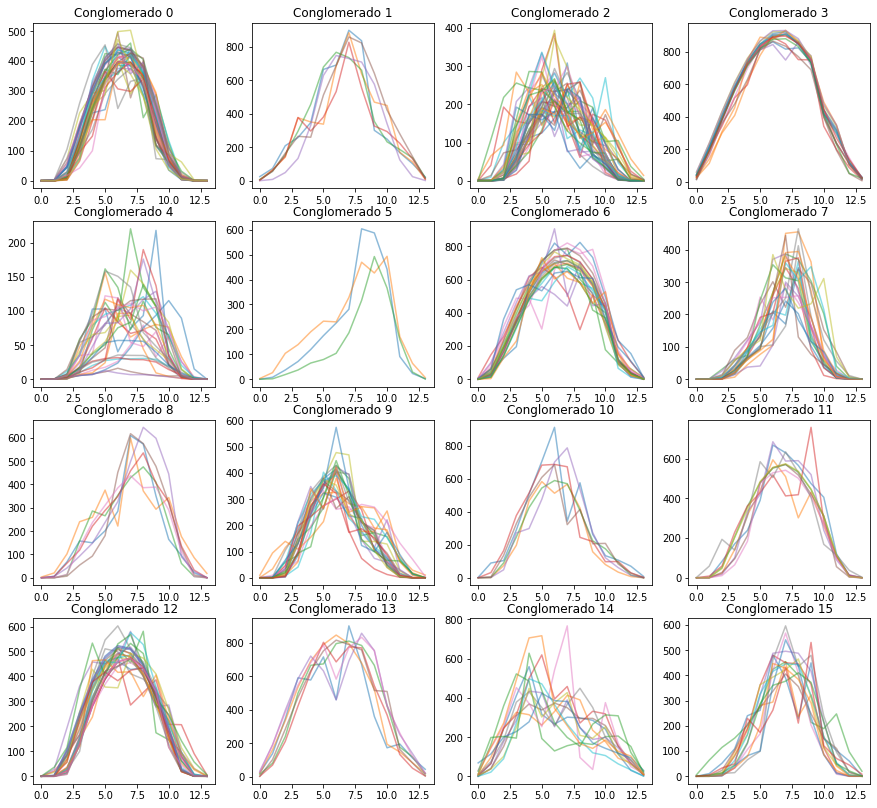

In [ ]:
print('X_train (LVQ)')
print_patrones(list_series=X_train,list_categorias=glvq_pred_train,list_patrones=[],title_='Conglomerado ')

# **GaussianMixture**

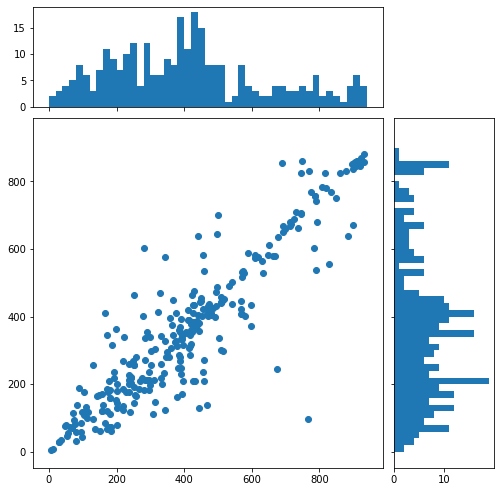

In [ ]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    # the scatter plot:
    ax.scatter(x, y)
    # now determine nice limits by hand:
    binwidth = 20
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth
    bins = np.arange(0, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')
# start with a square Figure
fig = plt.figure(figsize=(8, 8))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# use the previously defined function
scatter_hist(X_train[:,7],X_train[:,8], ax, ax_histx, ax_histy)

plt.show()

In [ ]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py
#https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
gm = GaussianMixture(n_components=n_clusters, init_params='kmeans',covariance_type='full') #full, tied, diag, spherical
gm.fit(X_train)
gm_pred_train = gm.predict(X_train)
gm_pred       = gm.predict(X_test)

print('classification accuracy train:', gm.score(X_train, gm_pred_train))
print('classification accuracy:', gm.score(X_test, gm_pred))

print('gm_pred',gm_pred)
print('gm_pred_train', gm_pred_train)


classification accuracy train: -40.16483397146843
classification accuracy: -212.9574253887559
gm_pred [8 8 8 8 5 1 7 4 5 8 8 1 8 8 8 5 5 8 7 4 8 8 8 8 1 7 5 4 1 5 8 8 8 8 8 5 8
 5 1 8 8 4 8 5 5 4 5 1 1 4 8 8 5 5 8 5 5 8 8 8 8 1 8 8 5 8 1 8 5 5 5 8]
gm_pred_train [ 8  5  8  4  9  1  4  1  8  1  8  4  8  1  8  9  7  7  4  8 15  4  8  1
 11  3  1  4  8  4  9  3  1  3 15  8 10 15 11  4 13  8  8 13  0  1 15  0
  5  4  1  3 14  3  8  7  4  6  0  1  8  8  3  8  8  8  8  8 14 11  8  8
  0  8  8  8  8  8  8  8  1 13  5  9  8  8 13  4  1  8  8  8  8  4 10  8
  8 10  5  6  1  8  1  8 14  5  7 15  5 10 14  7 14  8  6  5 14  7  4  8
 14  4  4  4  8  3 13  4  9  5  1  8  7  1  4  8  1 15  8  8  3  8  9  8
  8 15  6  8 12  1  1 14  5  8  1 13  8  8  9  8  0  9  8  4 14  4  8  8
  7  9  0  5  2 14  7  7  8  1  8 14 11  4  7  4  8  8  8  4  5 14  5  8
  9 14  8  1  4  1  1  8  0  8 13  5  0 10  8  6  6  0  2 10 13  4  0  6
  6 13  3  4  0  8  8  8  1  1 13 15  4  1  8  8 13  5  8  8  4  8  6  4
  8  8 

X_train (GaussianMixture)


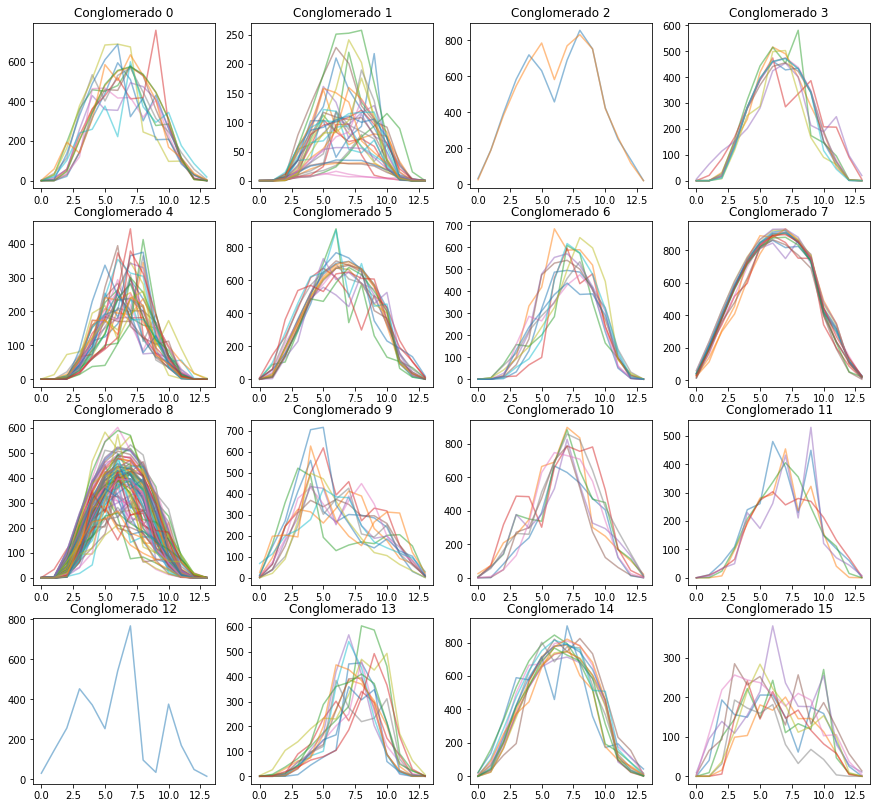

In [ ]:
print('X_train (GaussianMixture)')
print_patrones(list_series=X_train,list_categorias=gm_pred_train,list_patrones=[],title_='Conglomerado ')

X_test (GaussianMixture)


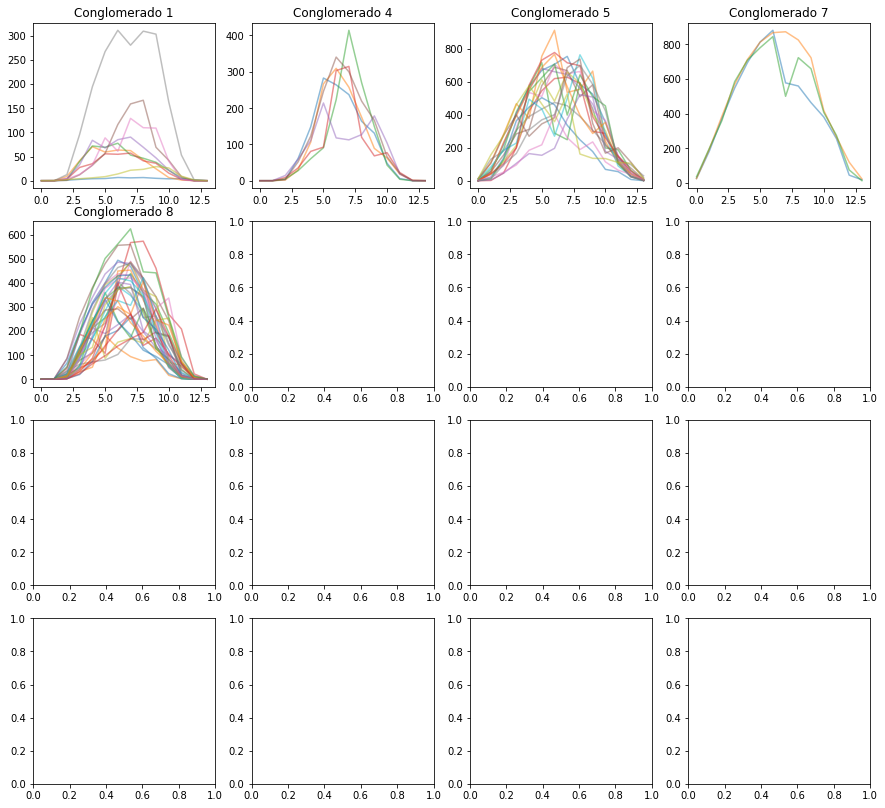

In [ ]:
print('X_test (GaussianMixture)')
print_patrones(list_series=X_test,list_categorias=gm_pred,list_patrones=[],title_='Conglomerado ')

# **KNN**

In [ ]:
#https://scikit-learn.org/stable/modules/neighbors.html#classification
nbrs = NearestNeighbors(n_neighbors=10, algorithm='auto').fit(X_train)  #['auto','ball_tree','kd_tree','brute'].
distances, indices = nbrs.kneighbors(X_train)
print(distances, indices)
nbrs.kneighbors_graph(X_train).toarray()

[[  0.          47.98066155  57.28183731 ...  92.30550273  95.46371333
   97.76059049]
 [  0.          30.23766508  74.23114241 ... 142.40885388 159.39431883
  169.61627442]
 [  0.          31.55575314  50.79092216 ... 122.41803722 123.56154676
  125.22115206]
 ...
 [  0.         255.94977859 264.98592311 ... 352.39280557 357.92196887
  359.64931844]
 [  0.          95.31110031 132.5825948  ... 155.16613318 156.56996307
  156.77836534]
 [  0.         117.549831   162.57728419 ... 204.04824532 207.61094493
  215.0489053 ]] [[  0 241 157 ... 268 223 135]
 [  1 112 110 ... 115 193 152]
 [  2  70 113 ... 223 166 260]
 ...
 [285  38  24 ... 257 155 180]
 [286 201 244 ...  26 255  96]
 [287 106 259 ... 111  16  55]]


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, labels)
knn_pred_train = knn.predict(X_train)
knn_pred       = knn.predict(X_test)
print('knn_pred', knn_pred)
print('knn_pred_train',knn_pred_train )
print(knn.score(X_test,knn_pred))

knn_pred [ 0  4 15  8  6  4  6  2  6  2 15  4 15  4  0 12 12  0  3  2  2  7  9  2
  4  3  6  7  4  6 12 12  0  0  2  6  0 12  4  2  7  2  0  6 11  4  9  4
  4  7  2  0  6  6  9  6  7  0 12  0  0 15  0  9 12 12  4  4  9 11 14  0]
knn_pred_train [ 0  6  0  2 14  4  7  4  9  4  9  2  9  4  0 14  3  3  2  9  2  2  0  4
 15 12  2  2  0  2 14 12  4 12  2  0 11  2  0  2  7  0  9  7 12  4  2 11
  6  7  4 12  6 12 12  3  2 15 12  4  0 12 12  0  0 12  0  0  6  0  0  0
 11  0 12  0  0 12  9  9  2  8 10 12  9 12  7  2  4  0  2 12  9  2  6  2
  9  6  6 11  4 12  4  2 13  6  3  2  6  6  6  3  6  0 15  6  6  3  7  0
  6  7  7  2  9 12  0  2 14  6  4 12  3  4  7  0  4  2  9 12 12 12 14  0
 12  2 15  2 14  4  2  6  6  9  4  7  0  0 14  0 12 14  9  2  6  7  0  0
  3  9 12  6  3  6  3  3 12  4  0  6  9  7  3  2 15  0  0  7  6  6  6 12
 14  6  0  4  7  2  4  9 12  2  7  6 12 11  9 11 12 12  3 12  7  2  8 12
  8  8  0  2 12  2 12  0  4  4  7  2  2  4  0  2  7  6  9  2  2 12  8  2
  0  0  2  9  2  6  0  8  

X_train (KNN)


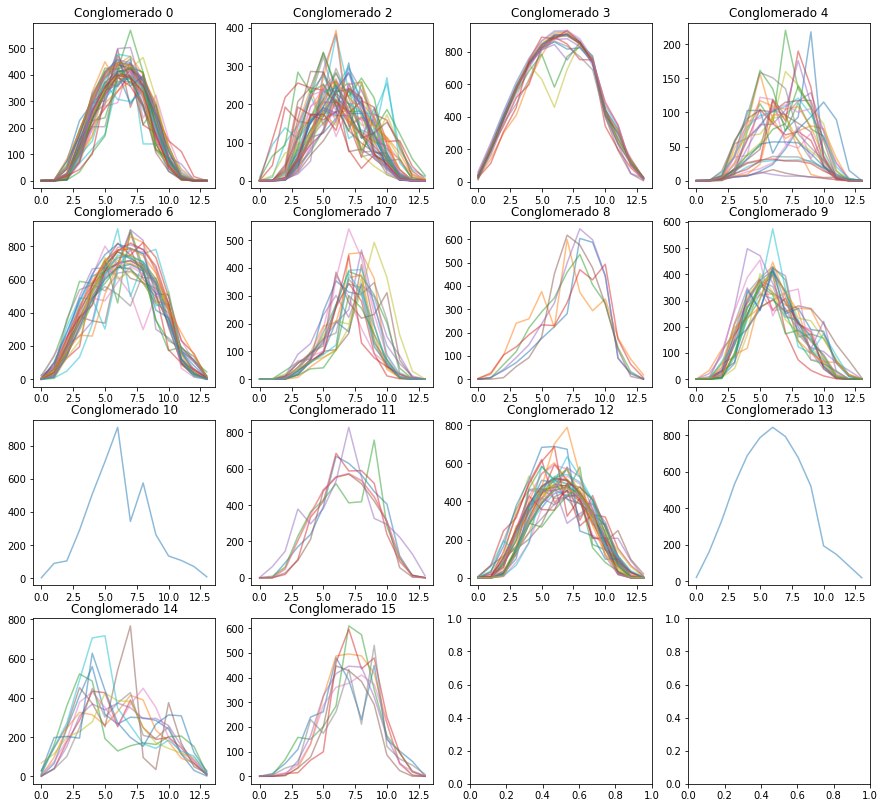

In [ ]:
print('X_train (KNN)')
print_patrones(list_series=X_train,list_categorias=knn_pred_train,list_patrones=[],title_='Conglomerado ')

X_test (KNN)


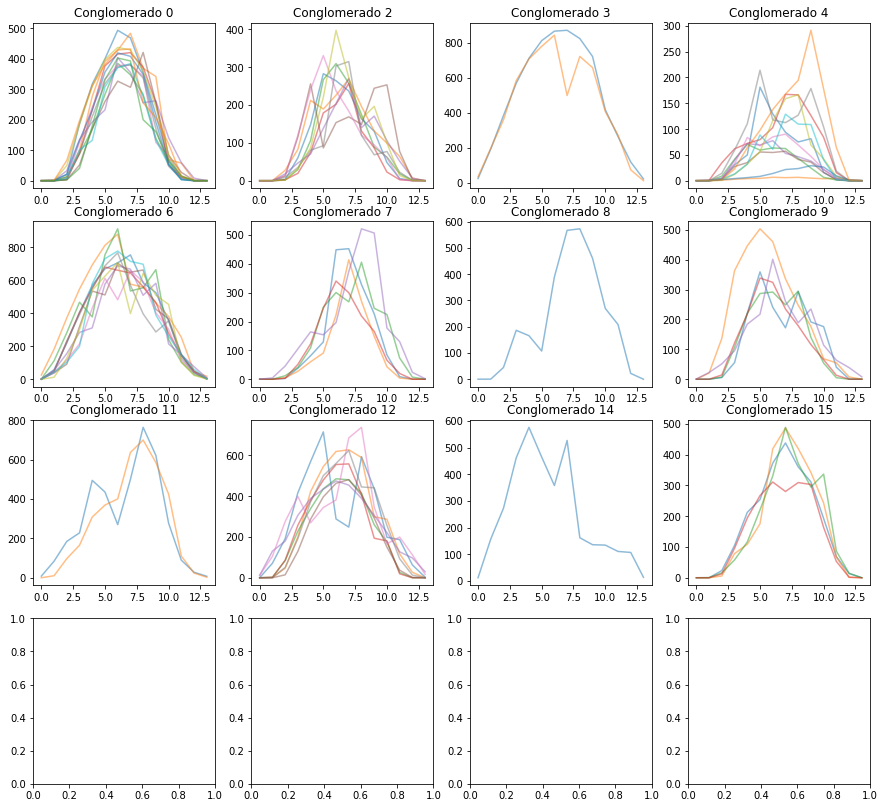

In [ ]:
print('X_test (KNN)')
print_patrones(list_series=X_test,list_categorias=knn_pred,list_patrones=[],title_='Conglomerado ')

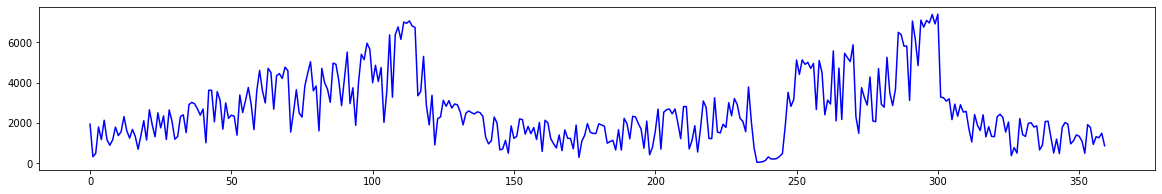

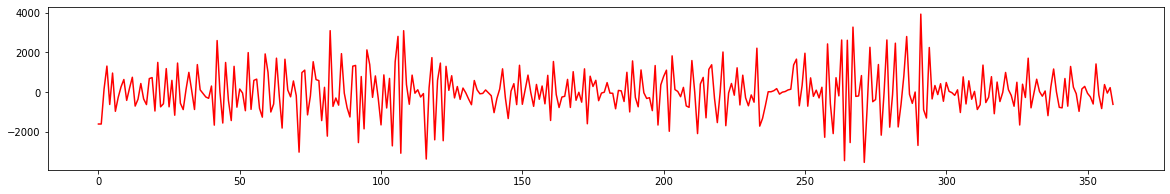

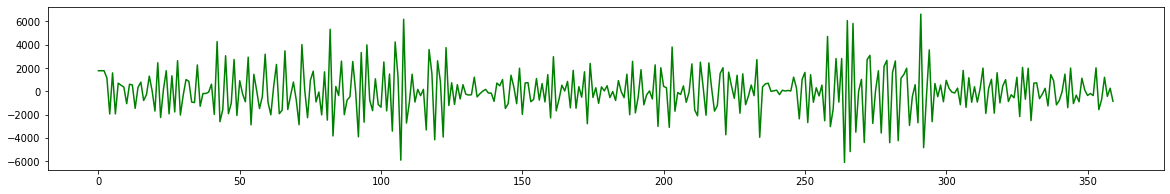

<Figure size 1440x216 with 0 Axes>

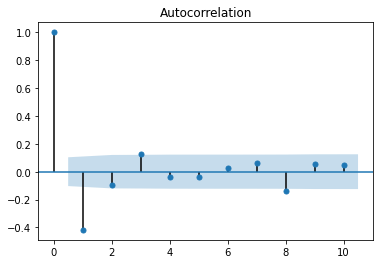

<Figure size 1440x216 with 0 Axes>

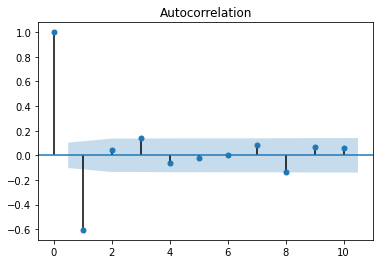

In [ ]:
plt.figure(figsize=(20, 3))
plt.plot(x_total,alpha=1,color='blue')
plt.show()
plt.figure(figsize=(20, 3))
plt.plot(dx_total,alpha=1,color='red')
plt.show()
plt.figure(figsize=(20, 3))
plt.plot(ddx_total,alpha=1,color='green')
plt.show()
plt.figure(figsize=(20, 3))
sm.graphics.tsa.plot_acf(dx_total, lags=10)
plt.show()
plt.figure(figsize=(20, 3))
sm.graphics.tsa.plot_acf(ddx_total, lags=10)
plt.show()